In [1]:
import numpy as np
import matplotlib.pyplot as plt

def covariance_1(ampl, size):
    
    coeff = np.zeros(2*size)
    
    for i in range(size):
        coeff[i] = np.exp(-i/ampl)
    
    for i in range(size-1):
        coeff[2*size-1-i] = np.exp(-(i+1)/ampl)

    return coeff

def covariance_2(ampl, size):
    
    coeff = np.zeros(2*size)
    
    for i in range(size):
        coeff[i] = np.exp(-(i**2)/ampl**2)
    
    for i in range(size-1):
        coeff[2*size-1-i] = np.exp(-(i+1)**2/ampl**2)

    return coeff


def generator_1D(cov, ampl, size):
    
    coeff = np.fft.fft(cov(ampl*size,int(size/2)))
  
    X = np.zeros((size,size))
    np.fill_diagonal(X, np.sqrt(coeff))
    
    theta = np.random.normal(size = size) + 1j*np.random.normal(size = size)
    gfield = np.fft.ifft(np.matmul(X,theta)).real[:size]
    
    return (gfield-np.mean(gfield))/np.std(gfield)


c:\users\me\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\index_tricks.py:909: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val
c:\users\me\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\index_tricks.py:909: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val


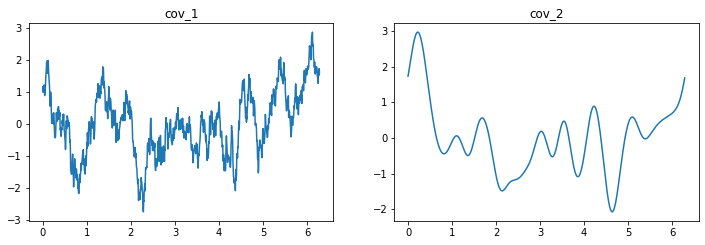

In [2]:
scale = 0.05 # scale of covariance
N = 1024 # number of mesh grids

plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.title('cov_1')
Y = generator_1D(covariance_1, scale, N)
plt.plot(np.linspace(0, 2*np.pi, N), Y)

plt.subplot(2, 2, 2)
plt.title('cov_2')
Y = generator_1D(covariance_2, scale, N)
plt.plot(np.linspace(0, 2*np.pi, N), Y)
